Q1) Frailty is physical weakness; lack of health or strength. Reduced grip strength in females correlated
with higher frailty scores and vice versa. Hand grip strength can be quantified by measuring the amount
of static force that the hand can squeeze around a dynamometer. The force has most commonly been
measured in kilograms and pounds. The table below represents data from 10 female participants. The
Height is measured in inches, Weight in pounds, Age in years, Grip strength in kilograms. Frailty is
qualitative attribute indicated the presence or absence of the symptoms. Based on the following table,
design the three stages of reproducible workflow, includes the work you can do and the folder structure
in each stage (reference study case in chapter 3). (5 points)







In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1 : Data table is saved as csv and named file as "raw_data.csv". Placed under folder "data_raw"


Step 2 : cleaning the data.

In [3]:
import pandas as pd
df_raw_data=pd.read_csv('/content/drive/MyDrive/PDS/Assignment1/Q1/Raw_data/raw_data.csv')
df_raw_data.head(10)

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


In [5]:
df_raw_data.columns=['Height(in)', 'Weight(lb)', 'Age', 'Grip_strength(kg)','Frailty']
df_raw_data.columns

# Converting categorical data to numerical class values
df_raw_data['Frailty'].replace(['Y', 'N'],
                        [0, 1], inplace=True)


In [6]:
df_clean_data=df_raw_data.dropna()
df_clean_data

,Height(in),Weight(lb),Age,Grip_strength(kg),Frailty
0,65.8,112,30,30,1
1,71.5,136,19,31,1
2,69.4,153,45,29,1
3,68.2,142,22,28,0
4,67.8,144,29,24,0
5,68.7,123,50,26,1
6,69.8,141,51,22,0
7,70.1,136,23,20,0
8,67.9,112,17,19,1
9,66.8,120,39,31,1


In [7]:
#Save the updated data to clean_data csv file
df_clean_data.to_csv('/content/drive/MyDrive/PDS/Assignment1/Q1/clean_data/clean_data.csv')

Step 3 : Exploratory Data Analysis

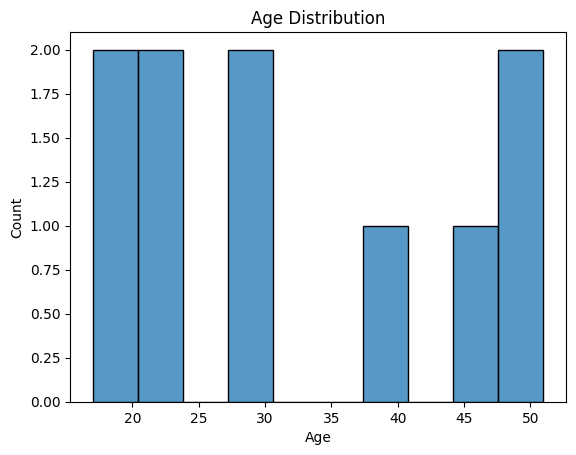

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
sns.histplot(df_clean_data['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Save the figure to a file
plt.savefig('/content/drive/MyDrive/PDS/Assignment1/Q1/Result/age_distribution.png')

# Display the plot
plt.show()


<ipython-input-10-f1e8e6ae1f51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s= sns.barplot(x='Frailty', y='Age', data=age_frailty, palette='Blues_d')


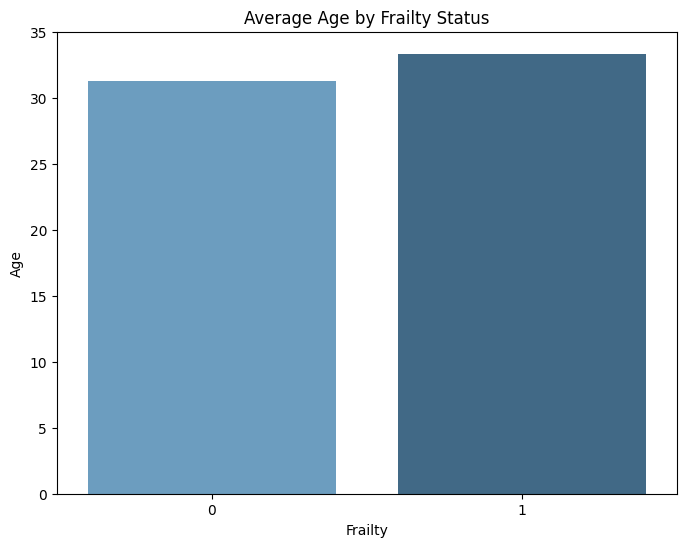

In [10]:

# Group by Frailty and calculate the average age
age_frailty = df_clean_data.groupby('Frailty')['Age'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8,6))
s= sns.barplot(x='Frailty', y='Age', data=age_frailty, palette='Blues_d')

# Add title and labels
plt.title('Average Age by Frailty Status')
plt.xlabel('Frailty')
plt.ylabel('Age')

# Show the plot
plt.show()

fig = s.get_figure()
fig.savefig("/content/drive/MyDrive/PDS/Assignment1/Q1/Result/avg_age_by_frailty.png")

<ipython-input-11-ffb8a14f44f2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s=sns.barplot(x='Frailty', y='Grip_strength(kg)', data=grip_strength_frailty, palette='Blues_d')


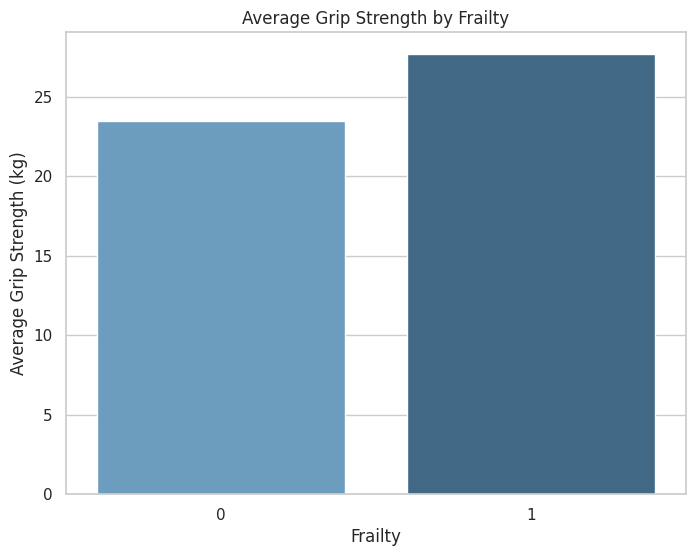

In [11]:

# Set the plot style
sns.set(style="whitegrid")

# Group by Frailty and calculate average Grip Strength
grip_strength_frailty = df_clean_data.groupby('Frailty')['Grip_strength(kg)'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8,6))
s=sns.barplot(x='Frailty', y='Grip_strength(kg)', data=grip_strength_frailty, palette='Blues_d')

# Add title and labels
plt.title('Average Grip Strength by Frailty')
plt.xlabel('Frailty')
plt.ylabel('Average Grip Strength (kg)')

# Show the plot
plt.show()

fig = s.get_figure()
fig.savefig("/content/drive/MyDrive/PDS/Assignment1/Q1/Result/avg_grip_strength_by_frailty.png")

Bubble plot using Age, Grip_strength, and Weight with hue for different colors

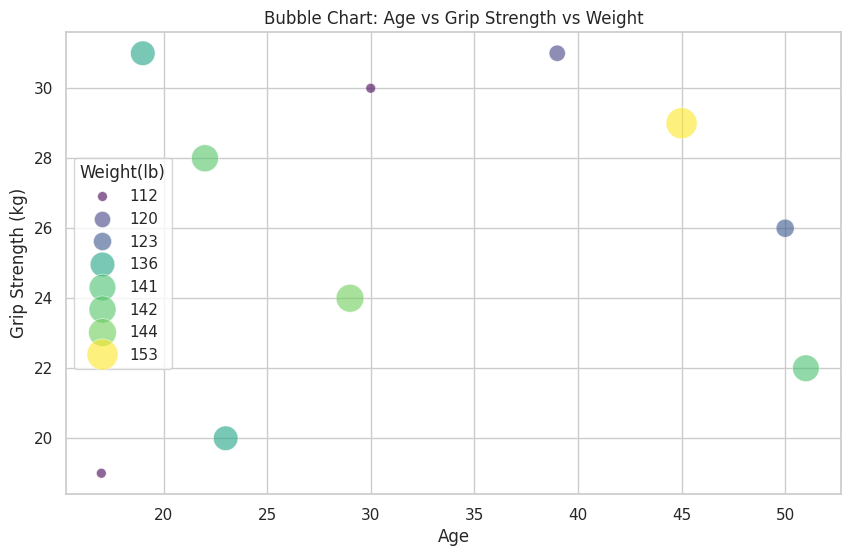

In [12]:
# Set plot size and style
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

# Create a bubble plot using Age, Grip_strength, and Weight with hue for different colors
s=sns.scatterplot(
    x='Age',
    y='Grip_strength(kg)',
    size='Weight(lb)',      # Weight determines the bubble size
    hue='Weight(lb)',       # Weight also determines the bubble color
    sizes=(50, 500),        # Size range for bubbles
    data= df_clean_data,
    alpha=0.6,              # Transparency level for bubbles
    palette="viridis",      # Color palette for Weight
    legend="full"           # Display full legend
)

# Add labels and title
plt.title('Bubble Chart: Age vs Grip Strength vs Weight')
plt.xlabel('Age')
plt.ylabel('Grip Strength (kg)')

# Show the plot
plt.show()

fig = s.get_figure()
fig.savefig("/content/drive/MyDrive/PDS/Assignment1/Q1/Result/bubble_chart_age_gripstrength_weight.png")

Scatter plot for Height, Grip Strength, and Weight

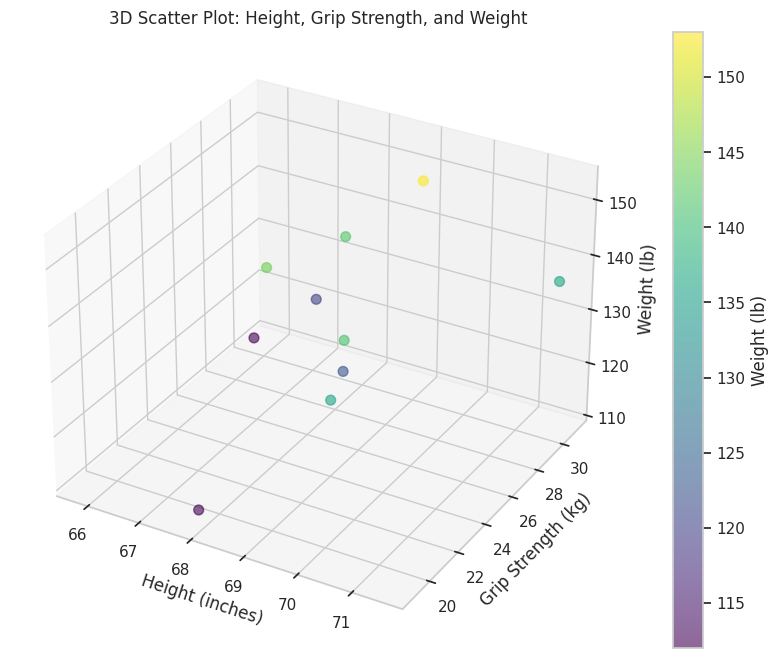

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the data
x = df_clean_data['Height(in)']       # Height
y = df_clean_data['Grip_strength(kg)'] # Grip Strength
z = df_clean_data['Weight(lb)']        # Weight

# Create a scatter plot
scatter = ax.scatter(x, y, z, c=z, s=50, cmap='viridis', alpha=0.6)

# Set labels
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Grip Strength (kg)')
ax.set_zlabel('Weight (lb)')

# Add a color bar which maps values to colors
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Weight (lb)')

# Set title
ax.set_title('3D Scatter Plot: Height, Grip Strength, and Weight')

# Show the plot
plt.show()

fig = ax.get_figure()
fig.savefig("/content/drive/MyDrive/PDS/Assignment1/Q1/Result/scatter_plot_height_grip_weight.png")
